In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time

import torch
from torchtext import data
import torch.nn as nn

import seaborn as sns

In [3]:
# read the data, it is 453 mb 
fanfic = pd.read_csv("SMUT_ALLT.csv")

In [4]:
fanfic["rating"].value_counts()

Explicit             52577
ExplicitNot Rated        1
Name: rating, dtype: int64

In [5]:
# only english 
fanfic = fanfic[fanfic["language"] == "English"]
fanfic = fanfic[fanfic["rating"] == "Explicit"]
fanfic.head()

,link,rating,category,fandom,relationship,characters,language,date,words,chapters,comments,kudos,bookmarks,hits,title,author,story
0,https://archiveofourown.org/works/15360777?vie...,Explicit,M/M,Les Misérables - All Media Types,Enjolras/Grantaire,Enjolras (Les Misérables)Grantaire (Les Miséra...,English,2018-07-20,2027,1/1,25,370,18,4537,The Merits of Proper Vehicular Care,dannyPURO,It’s Combeferre who ends up making Enjolras go...
1,https://archiveofourown.org/works/23178307?vie...,Explicit,M/M,The Witcher (TV),Geralt z Rivii | Geralt of Rivia/Jaskier | Dan...,Geralt z Rivii | Geralt of RiviaJaskier | Dand...,English,2020-03-16,1367,1/1,25,966,69,5932,Look but don't touch,valdomarx (cptxrogers),"Geralt just wants to sleep, but he can’t becau..."
2,https://archiveofourown.org/works/27064903?vie...,Explicit,M/M,Shadowhunters (TV),Magnus Bane/Alec Lightwood,NaN,English,2020-10-17,2463,1/1,25,188,14,2109,Better Than Date Night,TobytheWise,\n\n\n\n\n\n\n\n\n\nAlec checks his watch agai...
3,https://archiveofourown.org/works/19092640?vie...,Explicit,M/M,Harry Potter - J. K. Rowling,Draco Malfoy/Harry PotterRon Weasley/Blaise Za...,Harry PotterDraco MalfoyPansy ParkinsonHermion...,English,2019-06-04,1884,1/1,25,847,106,19322,Sleep Tight,melanie_bxx,"\n \nHarry sneaked into the house quietly, it..."
4,https://archiveofourown.org/works/27180773?vie...,Explicit,F/M,Avatar: The Last Airbender,Azula/Zuko (Avatar),NaN,English,2020-11-01,2384,1/1,26,21,1,648,Silk Sheets,Nichya,The second their parents announced they would ...


In [6]:
print(fanfic["rating"].value_counts())
print(fanfic["language"].value_counts())

print(fanfic["fandom"].value_counts())

Explicit    51562
Name: rating, dtype: int64
English    51562
Name: language, dtype: int64
Supernatural                                                             2877
방탄소년단 | Bangtan Boys | BTS                                               1550
Harry Potter - J. K. Rowling                                             1258
僕のヒーローアカデミア | Boku no Hero Academia | My Hero Academia                   1176
Haikyuu!!                                                                 663
                                                                         ... 
Political RPF - Philippine 21st c.                                          1
Captain America (Movies)Marvel Cinematic UniverseMarvel 616                 1
Shadowhun (tv)                                                              1
SECHSKIES (Band)Winner (Band)NJTTW신서유기 | New Journey To The West (TV)       1
Chicago FireBrettsey - FandomSylvie Brett - FandomMatt Casey - Fandom       1
Name: fandom, Length: 6970, dtype: int64


In [7]:
#count the words
fanfic["count"] = fanfic['story'].str.findall(r'(\w+)').str.len()
fanfic["count"].head()

0    2152
1    1428
2    2557
3    1955
4    2416
Name: count, dtype: int64

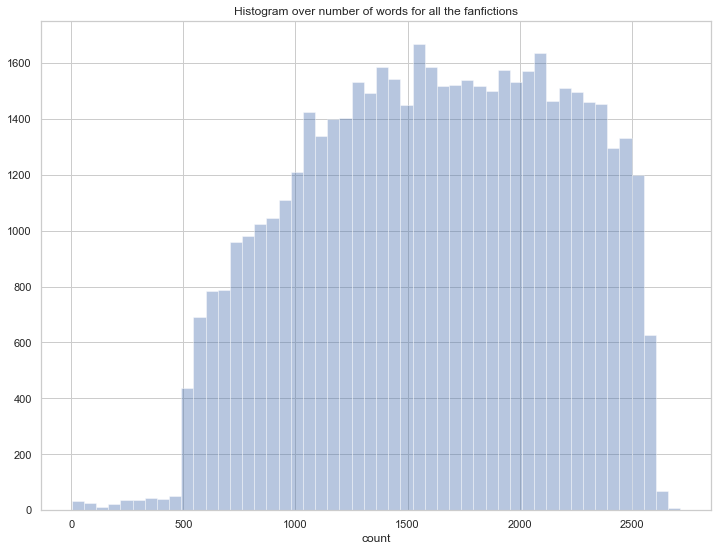

In [8]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(12, 9))
g = sns.distplot(fanfic["count"], bins=50, kde=False, rug=False)
#g.set(xlim=(0,20000))
plt.title("Histogram over number of words for all the fanfictions")
plt.show(g)


In [9]:
# Remove the longest fanfictions
fanfic = fanfic[fanfic["count"] < 2000]
fanfic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36116 entries, 1 to 52577
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   link          36116 non-null  object
 1   rating        36116 non-null  object
 2   category      35782 non-null  object
 3   fandom        36116 non-null  object
 4   relationship  35650 non-null  object
 5   characters    34418 non-null  object
 6   language      36116 non-null  object
 7   date          36116 non-null  object
 8   words         36116 non-null  int64 
 9   chapters      36116 non-null  object
 10  comments      36116 non-null  int64 
 11  kudos         36116 non-null  int64 
 12  bookmarks     36116 non-null  int64 
 13  hits          36116 non-null  int64 
 14  title         36116 non-null  object
 15  author        36116 non-null  object
 16  story         36116 non-null  object
 17  count         36116 non-null  int64 
dtypes: int64(6), object(12)
memory usage: 5.2+ MB


In [10]:
# Here I use the between argument in order to filter the data
test = fanfic[fanfic["count"].between(600,1500)]
test

,link,rating,category,fandom,relationship,characters,language,date,words,chapters,comments,kudos,bookmarks,hits,title,author,story,count
1,https://archiveofourown.org/works/23178307?vie...,Explicit,M/M,The Witcher (TV),Geralt z Rivii | Geralt of Rivia/Jaskier | Dan...,Geralt z Rivii | Geralt of RiviaJaskier | Dand...,English,2020-03-16,1367,1/1,25,966,69,5932,Look but don't touch,valdomarx (cptxrogers),"Geralt just wants to sleep, but he can’t becau...",1428
12,https://archiveofourown.org/works/13499134?vie...,Explicit,M/M,Harry Potter - J. K. Rowling,Sirius Black/Remus Lupin,Sirius BlackRemus Lupin,English,2018-01-28,842,1/1,25,279,13,6408,Go Down,shessocold,"Filch bolts the door, and – from the sound of ...",864
15,https://archiveofourown.org/works/24744328?vie...,Explicit,F/M,Game of Thrones (TV)A Song of Ice and Fire - G...,Jon Snow/Sansa Stark,Jon SnowSansa Stark,English,2020-06-16,1364,1/1,25,161,21,4382,White Wolf's Bite,EstherRuth,It’s that sharp cut of his dark eyes when he g...,1397
18,https://archiveofourown.org/works/21171203?vie...,Explicit,M/M,Sherlock (TV),Mycroft Holmes/Sherlock Holmes,Mycroft HolmesSherlock Holmes,English,2019-10-25,1222,1/1,25,59,3,844,Cocoon,LadyGlinda,The world is a crazy place. A place full of th...,1256
21,https://archiveofourown.org/works/8588431?view...,Explicit,M/M,文豪ストレイドッグス | Bungou Stray Dogs,Edogawa Ranpo/Edgar Allan Poe (Bungou Stray Dogs),Edogawa Ranpo (Bungou Stray Dogs)Edgar Allan P...,English,2016-11-18,1000,1/1,25,560,61,6481,even if your back is turned,MiniNephthys,If there’s anything Ranpo can say confidently ...,1056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52566,https://archiveofourown.org/works/885646?view_...,Explicit,M/M,World Wrestling Entertainment,Dean Ambrose/Seth Rollins,Dean AmbroseSeth Rollins,English,2013-07-16,937,1/1,0,47,1,1460,Red Velvet,mxjoyride,The first thing Seth saw when he woke up was D...,979
52568,https://archiveofourown.org/works/20992298?vie...,Explicit,F/M,新日本プロレス | New Japan Pro-Wrestling,Dean Ambrose | Jon Moxley/Reader,Dean Ambrose | Jon MoxleyReader,English,2019-10-11,1248,1/1,0,20,3,289,Bite Me,DeepDisiresLonging,Jon’s POV\nI’ve been called unhinged. A lunati...,1309
52572,https://archiveofourown.org/works/238636?view_...,Explicit,M/M,Stargate SG-1,Daniel Jackson/Jack O'Neill,Daniel JacksonJack O'Neill,English,2003-07-22,1379,1/1,0,19,2,442,Cooling Down or Heating Up?,ximeria,"""Jack... it's so damned hot around here - when...",1435
52575,https://archiveofourown.org/works/3902545?view...,Explicit,M/M,Dragon Age (Video Games)Dragon Age: Inquisition,Cullen Rutherford/Samson,Samson (Dragon Age)Cullen Rutherford,English,2015-05-08,955,1/1,0,16,0,522,Bar Fight,Dinosaurjockey,"Samson stood and pushed Cullen onto the bed, h...",981


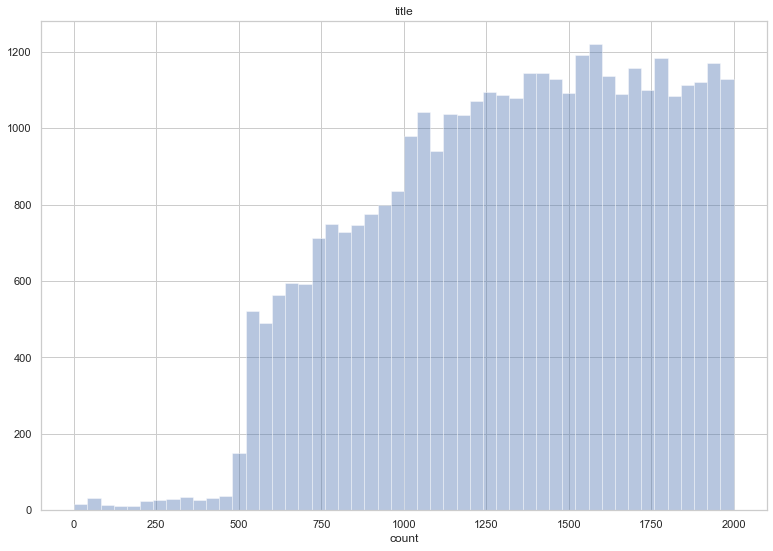

In [11]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(13, 9))
g = sns.distplot(fanfic["count"], bins=50, kde=False, rug=False)
#g.set(xlim=(0,20000))
plt.title("title")
plt.show(g)

In [13]:
def normalise_text(text):
    text = text.str.lower() # lowercase
    text = text.str.replace(r"\#","") # replaces hashtags
    text = text.str.replace(r"http\S+","URL")  # remove URL addresses
    text = text.str.replace(r"@","")
    text = text.str.replace(r"[^A-Za-z0-9()!?\'\`\"]", " ")
    text = text.str.replace("\s{2,}", " ")    # str makes it able to do it on the whole column at once
    text = text.str.replace('chapter text', '')  # removes chapter text which was in many words
    text = text.str.replace('nsfw', '')  # removes chapter text which was in many words
    text = text.str.replace('america', '')  # removes chapter text which was in many words
    return text

In [14]:

#normalise_text(fanfic.iloc[1,16])
fanfic["story"] = normalise_text(fanfic["story"])

In [15]:
test["story"] = normalise_text(test["story"])

5309
if there s anything ranpo can say confidently about poe and ranpo can say a lot of things confidently about poe because he s never wrong it s that he s shy shy shy shy he still peeks his head in the door of the agency to see if it s alright for him to enter even though he s come by many times by now he hates talking to people in public even when they re workers who deal with people like him everyday for a living and when ranpo gets handsy ranpo! poe hisses and swats his arm away ranpo reluctantly removes his hand from poe s behind poe turns fifty shades of red and gets mad at him every time it s a nice butt ranpo says with a shrug you d grab your butt too if it didn t belong to you i would not poe replies you ll notice i don t touch your behind mine s not as nice as yours ranpo says his butt is unfortunately pretty flat he s scrawny all over in general working on body shape is for people who have to use any part of their bodies besides their brains poe hides his behind his cape mo

In [16]:
print(len(test.iloc[4,16]))
print(test.iloc[4,16])

filch bolts the door and from the sound of it secures it additionally with a padlock remus curses inwardly sirius snickers remus glares at him but it's so dark inside the broom cupboard that the exercise is pretty pointless they hear filch walk away muttering darkly about missing buckets and thieving students who deserve nothing more than a good lashing the tip of sirius' raised wand suddenly lights up startling remus he's still not completely used to how good sirius has become at nonverbal spells sirius is grinning remus gives him an additional perfunctory dirty look sirius grins even more broadly relax moony he has no idea we're in here we just need to wait a bit just to make sure that the coast is clear and then we'll break out well let's find something fun to do in the meanwhile remus tries to stay annoyed at sirius he's a prefect he can't keep getting caught sirius knows perfectly well that he should stop involving him in his harebrained schemes but sirius as always makes it extre

In [17]:
print(test.iloc[1,16])

,link,rating,category,fandom,relationship,characters,language,date,words,chapters,comments,kudos,bookmarks,hits,title,author,story,count
1,https://archiveofourown.org/works/23178307?vie...,Explicit,M/M,The Witcher (TV),Geralt z Rivii | Geralt of Rivia/Jaskier | Dan...,Geralt z Rivii | Geralt of RiviaJaskier | Dand...,English,2020-03-16,1367,1/1,25,966,69,5932,Look but don't touch,valdomarx (cptxrogers),geralt just wants to sleep but he can t becaus...,1428
12,https://archiveofourown.org/works/13499134?vie...,Explicit,M/M,Harry Potter - J. K. Rowling,Sirius Black/Remus Lupin,Sirius BlackRemus Lupin,English,2018-01-28,842,1/1,25,279,13,6408,Go Down,shessocold,filch bolts the door and from the sound of it ...,864
15,https://archiveofourown.org/works/24744328?vie...,Explicit,F/M,Game of Thrones (TV)A Song of Ice and Fire - G...,Jon Snow/Sansa Stark,Jon SnowSansa Stark,English,2020-06-16,1364,1/1,25,161,21,4382,White Wolf's Bite,EstherRuth,it s that sharp cut of his dark eyes when he g...,1397
18,https://archiveofourown.org/works/21171203?vie...,Explicit,M/M,Sherlock (TV),Mycroft Holmes/Sherlock Holmes,Mycroft HolmesSherlock Holmes,English,2019-10-25,1222,1/1,25,59,3,844,Cocoon,LadyGlinda,the world is a crazy place a place full of thr...,1256
21,https://archiveofourown.org/works/8588431?view...,Explicit,M/M,文豪ストレイドッグス | Bungou Stray Dogs,Edogawa Ranpo/Edgar Allan Poe (Bungou Stray Dogs),Edogawa Ranpo (Bungou Stray Dogs)Edgar Allan P...,English,2016-11-18,1000,1/1,25,560,61,6481,even if your back is turned,MiniNephthys,if there s anything ranpo can say confidently ...,1056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52566,https://archiveofourown.org/works/885646?view_...,Explicit,M/M,World Wrestling Entertainment,Dean Ambrose/Seth Rollins,Dean AmbroseSeth Rollins,English,2013-07-16,937,1/1,0,47,1,1460,Red Velvet,mxjoyride,the first thing seth saw when he woke up was d...,979
52568,https://archiveofourown.org/works/20992298?vie...,Explicit,F/M,新日本プロレス | New Japan Pro-Wrestling,Dean Ambrose | Jon Moxley/Reader,Dean Ambrose | Jon MoxleyReader,English,2019-10-11,1248,1/1,0,20,3,289,Bite Me,DeepDisiresLonging,jon s pov i ve been called unhinged a lunatic ...,1309
52572,https://archiveofourown.org/works/238636?view_...,Explicit,M/M,Stargate SG-1,Daniel Jackson/Jack O'Neill,Daniel JacksonJack O'Neill,English,2003-07-22,1379,1/1,0,19,2,442,Cooling Down or Heating Up?,ximeria,"""jack it's so damned hot around here when are ...",1435
52575,https://archiveofourown.org/works/3902545?view...,Explicit,M/M,Dragon Age (Video Games)Dragon Age: Inquisition,Cullen Rutherford/Samson,Samson (Dragon Age)Cullen Rutherford,English,2015-05-08,955,1/1,0,16,0,522,Bar Fight,Dinosaurjockey,samson stood and pushed cullen onto the bed he...,981


In [18]:
# How the function that looks at the data should look like 

The problem is that there seems to be to much text in the data that is not good, for example 3000 words but only small sentences that are sexual tension

### Print the number of comments

### Print the number of len

### Show 1/5 of each time and make the input binary, yes = sexual tension no = normal

### Make the function able to remove the observation

### Make the function able to go back

7388
4737
7191
6800
5309
7379
7412
3886
5105
7418


In [21]:
test

,name,value
0,id1,1
1,id1,5
2,id1,7
3,id1,2
0,id2,5
1,id2,1
2,id2,7
3,id2,3


In [22]:
for i in range(10):
    print(len(test.iloc[i,16]))

[1, 5, 7, 2]
id1
[5, 1, 7, 3]
id2


In [23]:
story_dic = {}
for i in range(10):
    story_id = test.iloc[i,0]
    Number = int(len(test.iloc[i,16])/5)
    ho = list(map(''.join, zip(*[iter(s)]*Number)))
    story_dic[story_id ] = ho

,name,value
0,id1,1
1,id1,5
2,id1,7
3,id1,2
0,id2,5
1,id2,1
2,id2,7
3,id2,3


In [ ]:
for i in story_dic.items():
    print(i[0])

In [ ]:
# My dictionary will look like this so i test on how to make it into a dataframe that I want
test_dic = {"id1": [1,5,7,2], "id2":[5,1,7,3]}

df = pd.concat(pd.DataFrame({'name':k, 'value':v}) for k, v in test_dic.items())
df

In [ ]:
for i in test_dic.items():
    print(i[1])
    print(i[0])

In [ ]:
df = pd.concat(pd.DataFrame({'name':k, 'value':v}) for k, v in test_dic.items())
df

In [ ]:
df